# 4. 分类服饰图像

_Kevin Siswandi_  
_Deep Learning Nanodegree_

好了，我们来实战演练。你将使用 [Fashion-MNIST 数据集](https://github.com/zalandoresearch/fashion-mnist)。对于神经网络来说，MNIST 的规模很小，可以轻松地达到 97% 的准确率。Fashion-MNIST 包括很多 28x28 灰色服饰图像。它比 MNIST 更复杂，也更贴近实际现实需求。

<img src='assets/fashion-mnist-sprite.png' width=400px>

你要在这个 notebook 里构建神经网络。首先，通过 torchvision 加载数据集。

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting /Users/kevinsiswandi/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/kevinsiswandi/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /Users/kevinsiswandi/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/kevinsiswandi/.pytorch/F_MNIST_data/FashionMNIST/raw



Extracting /Users/kevinsiswandi/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/kevinsiswandi/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /Users/kevinsiswandi/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/kevinsiswandi/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!





/Users/kevinsiswandi/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1603729051302/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


下面是一个图像示例。

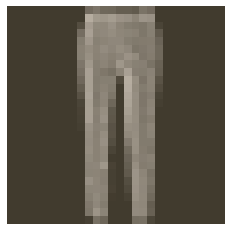

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

你要先定义网络。和 MNIST 一样，每个图像是 28x28 = 784 像素，并且有 10 个类别。你应该至少包含一个隐藏层。建议对层级使用 ReLU 激活函数，并返回前向传播的对数或 log-softmax。你可以决定添加多少个层级以及这些层级的大小。

In [3]:
# TODO: Define your network architecture here
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

现在，来试试创建并训练网络。首先，你需要定义[条件](http://pytorch.org/docs/master/nn.html#loss-functions)（例如 `nn.CrossEntropyLoss`）和[优化器](http://pytorch.org/docs/master/optim.html)（通常是 `optim.SGD` 或 `optim.Adam`）。

然后编写训练代码。你可以参考这个流程：

* 通过网络进行正向传递以获取logits 
* 使用 logits 计算损失
* 通过 `loss.backward()` 在网络中反向传播以计算梯度
* 使用优化器更新权重

通过调整参数（隐藏单元、学习速率等），你应该能够使训练损失低于 0.4。

In [4]:
# TODO: Create the network, define the criterion and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [5]:
# TODO: Train the network here
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5156693485722359
Training loss: 0.39229403715779276
Training loss: 0.3574962176001275
Training loss: 0.3321518652252297
Training loss: 0.31927844627833823


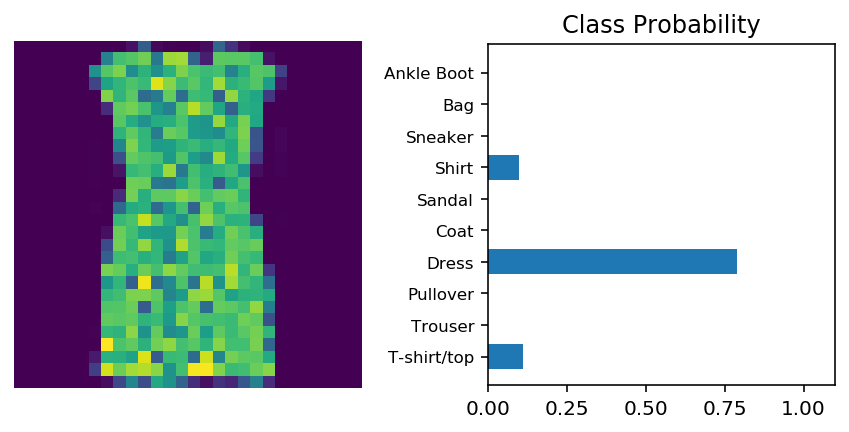

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')